<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Perceptron on XOR Gates](#Q2)
3. [Multilayer Perceptron](#Q3)
4. [Keras MMP](#Q4)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** A function that receives an input and pass it to the next layer of nodes through activation function
- **Input Layer:** A layer that receives input from dataset to be passed to network
- **Hidden Layer:** The layer in between input and output which they perform their functions, but we don't directly interact with them
- **Output Layer:** Output a vector of values that is in a format that is suitable for the type of problem that we're trying to address through activation function
- **Activation:** A function that transform the signal to pass onto the next layer
- **Backpropagation:** An algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch


## 2. Perceptron <a id="Q3=2"></a>

Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

|x1	|x2|x3|	y|
|---|---|---|---|
1|	1|	1|	1|
1|	0|	1|	0|
0|	1|	1|	0|
0|	0|	1|	0|

In [132]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
import numpy as np
import pandas as pd

np.random.seed(12)
# 3 input nodes
X = np.array(([1,1,1], [1,0,1], [0,1,1], [0,0,1]), dtype=float)
# 1 output node
y = np.array(([1], [0], [0], [0]), dtype=float)

print("3 inputs \n", X)
print("1 output \n", y)

3 inputs 
 [[1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]
1 output 
 [[1.]
 [0.]
 [0.]
 [0.]]


In [51]:
class Perceptron:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = X.shape[1]
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # Initial Weights
        # 3x4 Matrix Array for the First Layer
        self.weights1 = 2 * np.random.randn(self.inputs, self.hiddenNodes) - 1
        # 4x1 Matrix Array for Hidden to Output
        self.weights2 = 2 * np.random.rand(self.hiddenNodes, self.outputNodes) - 1
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        
        # Error in output
        self.o_error = y - o
        
        # Apply derivative of sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T) # how much the hidden layer weights were off
        # How much of that "far off" can be explained by the inputs => hidden layer
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)
        
        # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
    def train(self, X, y):
        # Output
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [56]:
nn = Perceptron()
np.random.seed(12)
loss_lst = []
# number of epochs / iterations
for i in range(1000):
    if (i+1 in [1,2,3]) or ((i+1) % 50 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
#         print('Input: \n', X)
#         print('Actual Output: \n', y)
#         print('Predicted Output: \n', str(nn.feed_forward(X)))
        loss = np.mean(np.square(y - nn.feed_forward(X)))
        if loss < .01:
            print('Input: \n', X)
            print('Actual Output: \n', y)
            print('Predicted Output: \n', str(nn.feed_forward(X)))
            print("Loss: \n", str(loss))
            break
        print("Loss: \n", str(loss))
    loss_lst.append(loss)
    nn.train(X,y)

+---------EPOCH 1---------+
Loss: 
 0.2633356696845635
+---------EPOCH 2---------+
Loss: 
 0.37966202034086133
+---------EPOCH 3---------+
Loss: 
 0.41440460359441916
+---------EPOCH 50---------+
Loss: 
 0.0997924972764671
+---------EPOCH 100---------+
Loss: 
 0.07639776303537395
+---------EPOCH 150---------+
Loss: 
 0.07442462837890616
+---------EPOCH 200---------+
Loss: 
 0.09189831084695625
+---------EPOCH 250---------+
Loss: 
 0.06587368742008175
+---------EPOCH 300---------+
Loss: 
 0.06125323181180962
+---------EPOCH 350---------+
Loss: 
 0.06250213686947978
+---------EPOCH 400---------+
Loss: 
 0.05974213583991388
+---------EPOCH 450---------+
Loss: 
 0.05884994054877512
+---------EPOCH 500---------+
Loss: 
 0.058638556021806794
+---------EPOCH 550---------+
Loss: 
 0.05852033650005535
+---------EPOCH 600---------+
Loss: 
 0.05827280779848982
+---------EPOCH 650---------+
Loss: 
 0.05815970647427748
+---------EPOCH 700---------+
Loss: 
 0.05807205364193028
+---------EPOCH 750---

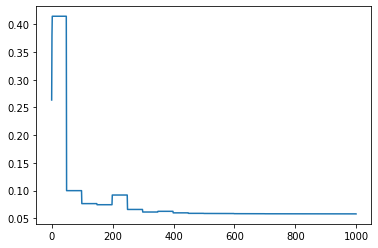

In [57]:
import matplotlib.pyplot as plt

plt.plot(loss_lst)

## 3. Multilayer Perceptron <a id="Q3"></a>

Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights.
Your network must have one hidden layer.
You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
Train your model on the Heart Disease dataset from UCI:



In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0


In [25]:
sc = StandardScaler()
dataset = df.values
# split into input (X) and output (y) variables
X = dataset[:,:-1]
X = sc.fit_transform(X)
y = dataset[:,-1]
y = y.reshape(y.shape[0], 1)
print(X.shape)
print(y.shape)

(303, 13)
(303, 1)


In [34]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = X.shape[1]
        self.hiddenNodes = 13
        self.outputNodes = 1
        
        # Initial Weights
        # 13x26 Matrix Array for the First Layer
        self.weights1 = 2 * np.random.randn(self.inputs, self.hiddenNodes) - 1
        # 26x1 Matrix Array for Hidden to Output
        self.weights2 = 2 * np.random.rand(self.hiddenNodes, self.outputNodes) - 1
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        
        # Error in output
        self.o_error = y - o
        
        # Apply derivative of sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T) # how much the hidden layer weights were off
        # How much of that "far off" can be explained by the inputs => hidden layer
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)
        
        # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
    def train(self, X, y):
        # Output
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [48]:
nn = NeuralNetwork()
# number of epochs / iterations
loss_lst = []
for i in range(1000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 50 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        loss = np.mean(np.square(y - nn.feed_forward(X)))
#         if loss < .1:
#             print('Input: \n', X)
#             print('First 5 Actual Output: \n', y[:5])
#             print('First 5 Predicted Output: \n', str(nn.feed_forward(X)[:5]))
#             print("Total Loss: \n", str(loss))
#             break
        print("Loss: \n", str(loss))
    loss_lst.append(loss)
    nn.train(X,y)

+---------EPOCH 1---------+
Loss: 
 0.2978637787646219
+---------EPOCH 2---------+
Loss: 
 0.5405486976197587
+---------EPOCH 3---------+
Loss: 
 0.5287508850082298
+---------EPOCH 4---------+
Loss: 
 0.4962166761337012
+---------EPOCH 5---------+
Loss: 
 0.4450027480995814
+---------EPOCH 50---------+
Loss: 
 0.08933022163068424
+---------EPOCH 100---------+
Loss: 
 0.08919254714574228
+---------EPOCH 150---------+
Loss: 
 0.08589660132360263
+---------EPOCH 200---------+
Loss: 
 0.06294560232083063
+---------EPOCH 250---------+
Loss: 
 0.05963039822035064
+---------EPOCH 300---------+
Loss: 
 0.05953714306383379
+---------EPOCH 350---------+
Loss: 
 0.05950389650207643
+---------EPOCH 400---------+
Loss: 
 0.059484709633549286
+---------EPOCH 450---------+
Loss: 
 0.05947208235514174
+---------EPOCH 500---------+
Loss: 
 0.059463135403712876
+---------EPOCH 550---------+
Loss: 
 0.059456444547792524
+---------EPOCH 600---------+
Loss: 
 0.059451233896399946
+---------EPOCH 650-------

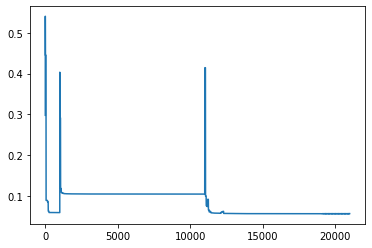

In [53]:
import matplotlib.pyplot as plt

plt.plot(loss_lst)

## 4. Keras MMP <a id="Q4"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1


In [74]:
sc = StandardScaler()
df = sc.fit_transform(df)
# split into input (X) and output (y) variables
X = df[:,:-1]
y = df[:,-1]

print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [84]:
from keras.optimizers import Adam
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    # Input layer
    model.add(Dense(num_neurons, input_dim=(X.shape[1]), activation='relu', kernel_initializer=init_mode))
#     model.add(Dropout(0.05))
    # Hidden Layers
    model.add(Dense(num_neurons, activation='sigmoid', kernel_initializer=init_mode))
#     model.add(Dropout(0.05))
    model.add(Dense(num_neurons, activation='relu', kernel_initializer=init_mode))
#     model.add(Dropout(0.05))
    # Output Layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init_mode)) # sigmoid for binary output
    # Compile model
    adam = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

## Baseline Model and Accuracy

In [91]:
# hyperparameters 83.9%
num_neurons = 13
epochs = 10
batch_size = 13
init_mode = 'normal'
learning_rate = .5
# create model
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=1)
model.fit(X, y, validation_split=.1)
# validation_split - reserve some data from dataset
# verbose shows the print statements

Train on 272 samples, validate on 31 samples
Epoch 1/10
272/272 [==============================] - 4s 14ms/sample - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6919 - val_acc: 0.6452
Epoch 2/10
272/272 [==============================] - 0s 497us/sample - loss: 0.6926 - acc: 0.5331 - val_loss: 0.6892 - val_acc: 0.6452
Epoch 3/10
272/272 [==============================] - 0s 438us/sample - loss: 0.6916 - acc: 0.5331 - val_loss: 0.6865 - val_acc: 0.6452
Epoch 4/10
272/272 [==============================] - 0s 456us/sample - loss: 0.6899 - acc: 0.5331 - val_loss: 0.6819 - val_acc: 0.6452
Epoch 5/10
272/272 [==============================] - 0s 557us/sample - loss: 0.6851 - acc: 0.5331 - val_loss: 0.6691 - val_acc: 0.6452
Epoch 6/10
272/272 [==============================] - 0s 510us/sample - loss: 0.6715 - acc: 0.5331 - val_loss: 0.6442 - val_acc: 0.6452
Epoch 7/10
272/272 [==============================] - 0s 453us/sample - loss: 0.6409 - acc: 0.5625 - val_loss: 0.5952 - val_acc: 0.7097
Epoc

## GridSearchCV to hyperparameter tune your model

In [128]:
# Hyperparameters
num_neurons = 13
init_mode = 'normal'
learning_rate = .5
# Grid Search parameters
param_grid = {'batch_size': [10, 30, 50, 100],
              'epochs': [10, 20]}
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

C:\Users\George\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.8085808555285136 using {'batch_size': 10, 'epochs': 20}

Means: 0.7095709641774496, Stdev: 0.1289242458579567 with: {'batch_size': 10, 'epochs': 10}
Means: 0.8085808555285136, Stdev: 0.03820407080172275 with: {'batch_size': 10, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 30, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 30, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 50, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 50, 'epochs': 20}
Means: 0.495049516359965, Stdev: 0.04917382333385347 with: {'batch_size': 100, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 100, 'epochs': 20}


In [129]:
# Hyperparameters
num_neurons = 26
init_mode = 'normal'
learning_rate = .5
# Grid Search parameters
param_grid = {'batch_size': [10, 30, 50, 100],
              'epochs': [10, 20]}
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8349835077921549 using {'batch_size': 10, 'epochs': 10}

Means: 0.8349835077921549, Stdev: 0.07335350495647412 with: {'batch_size': 10, 'epochs': 10}
Means: 0.8118811845779419, Stdev: 0.04917379533104063 with: {'batch_size': 10, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 30, 'epochs': 10}
Means: 0.8151815136273702, Stdev: 0.05502748195212182 with: {'batch_size': 30, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 50, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 50, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 100, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 100, 'epochs': 20}


In [130]:
# Hyperparameters
num_neurons = 13
init_mode = 'uniform'
learning_rate = .5
# Grid Search parameters
param_grid = {'batch_size': [10, 30, 50, 100],
              'epochs': [10, 20]}
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8250825007756551 using {'batch_size': 10, 'epochs': 20}

Means: 0.7788779139518738, Stdev: 0.08719369697853102 with: {'batch_size': 10, 'epochs': 10}
Means: 0.8250825007756551, Stdev: 0.032671590713967885 with: {'batch_size': 10, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 30, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 30, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 50, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 50, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 100, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 100, 'epochs': 20}


In [131]:
# Hyperparameters
num_neurons = 13
init_mode = 'normal'
learning_rate = .1
# Grid Search parameters
param_grid = {'batch_size': [10, 30, 50, 100],
              'epochs': [10, 20]}
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8250825007756551 using {'batch_size': 10, 'epochs': 20}

Means: 0.6336633761723837, Stdev: 0.120721715539791 with: {'batch_size': 10, 'epochs': 10}
Means: 0.8250825007756551, Stdev: 0.033656884448624094 with: {'batch_size': 10, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 30, 'epochs': 10}
Means: 0.7524752418200175, Stdev: 0.0889253680317193 with: {'batch_size': 30, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 50, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 50, 'epochs': 20}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 100, 'epochs': 10}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'batch_size': 100, 'epochs': 20}
